In [200]:
#with Dropout
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D,Flatten,Dense,BatchNormalization,MaxPooling2D,Dropout
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tqdm import tqdm
import cv2
from random import shuffle 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import random as rn

In [27]:
TRAIN_DIR = 'train'
TEST_DIR = 'test'

In [28]:
os.listdir(TRAIN_DIR)

['cat.0.jpg',
 'cat.1.jpg',
 'cat.10.jpg',
 'cat.100.jpg',
 'cat.1000.jpg',
 'cat.10000.jpg',
 'cat.10001.jpg',
 'cat.10002.jpg',
 'cat.10003.jpg',
 'cat.10004.jpg',
 'cat.10005.jpg',
 'cat.10006.jpg',
 'cat.10007.jpg',
 'cat.10008.jpg',
 'cat.10009.jpg',
 'cat.1001.jpg',
 'cat.10010.jpg',
 'cat.10011.jpg',
 'cat.10012.jpg',
 'cat.10013.jpg',
 'cat.10014.jpg',
 'cat.10015.jpg',
 'cat.10016.jpg',
 'cat.10017.jpg',
 'cat.10018.jpg',
 'cat.10019.jpg',
 'cat.1002.jpg',
 'cat.10020.jpg',
 'cat.10021.jpg',
 'cat.10022.jpg',
 'cat.10023.jpg',
 'cat.10024.jpg',
 'cat.10025.jpg',
 'cat.10026.jpg',
 'cat.10027.jpg',
 'cat.10028.jpg',
 'cat.10029.jpg',
 'cat.1003.jpg',
 'cat.10030.jpg',
 'cat.10031.jpg',
 'cat.10032.jpg',
 'cat.10033.jpg',
 'cat.10034.jpg',
 'cat.10035.jpg',
 'cat.10036.jpg',
 'cat.10037.jpg',
 'cat.10038.jpg',
 'cat.10039.jpg',
 'cat.1004.jpg',
 'cat.10040.jpg',
 'cat.10041.jpg',
 'cat.10042.jpg',
 'cat.10043.jpg',
 'cat.10044.jpg',
 'cat.10045.jpg',
 'cat.10046.jpg',
 'cat.1004

In [29]:
def label_img(img):
    word_label = img.split('.')[0]
    return word_label

In [30]:
label_img( 'dog.10020.jpg')

'dog'

In [41]:
img_row=28
img_col =28

In [45]:
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label=label_img(img)
        path = os.path.join(TRAIN_DIR,img)
        img_num = img.split('.')[0]
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (img_row,img_col))
        training_data.append([np.array(img),str(label)])
        
    shuffle(training_data)
    return training_data

In [46]:
train_data=create_train_data()

100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [01:53<00:00, 220.81it/s]


In [214]:
X= np.array([i[0] for i in train_data]).reshape(-1,img_row,img_col,3)
Y= np.array([i[1] for i in train_data])
print(images.shape) 
print(labels.shape)

(25000, 28, 28, 3)
(25000,)


In [215]:
#  cat -> 0, dog -> 1
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

In [216]:
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

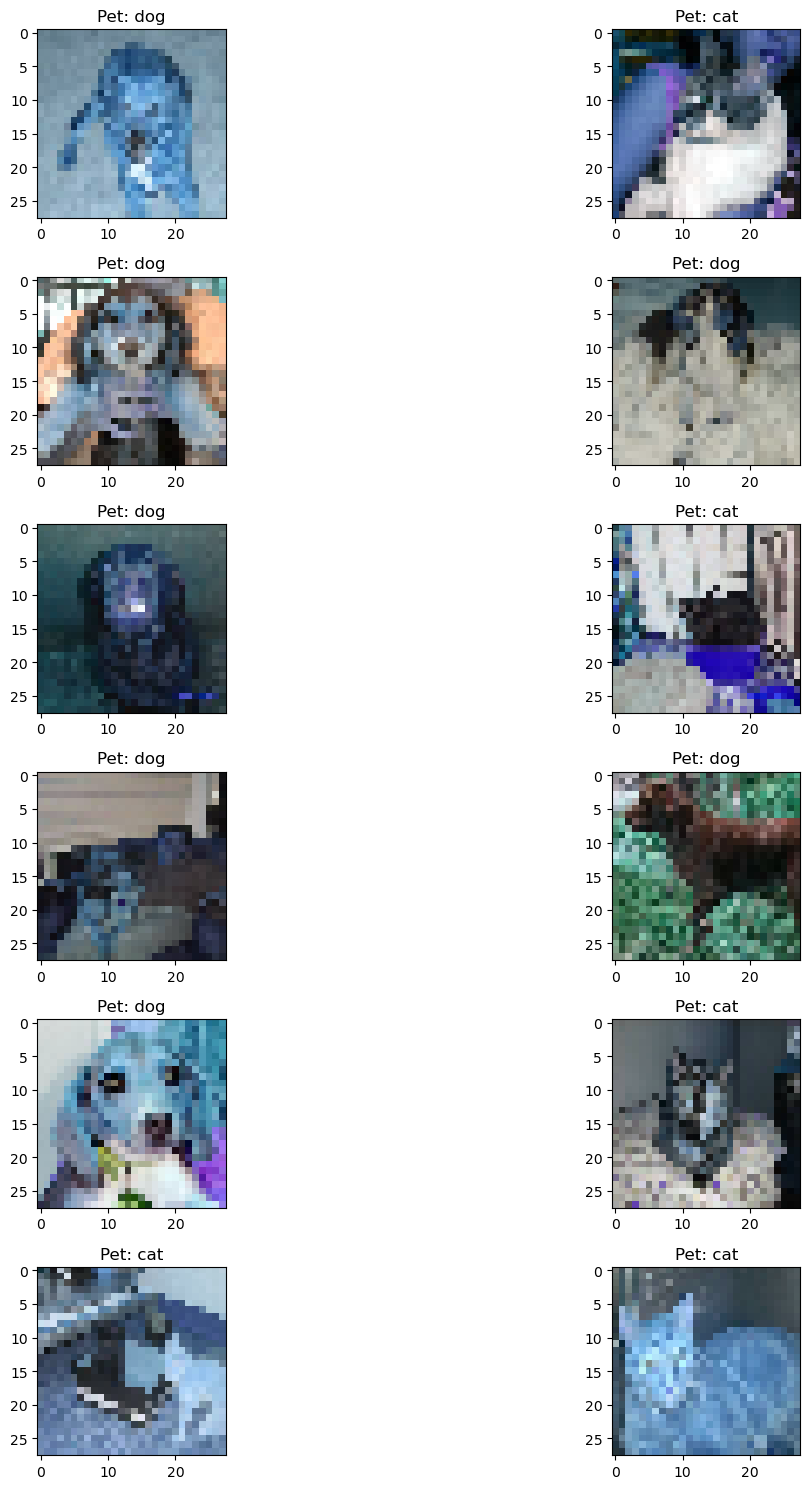

In [203]:
fig, ax = plt.subplots(6, 2)
fig.set_size_inches(15, 15)

for i in range(6):
    for j in range(2):
        l = rn.randint(0, len(x_val) - 1)  # Validasyon veri setindeki rastgele bir indeks seçme
        ax[i, j].imshow(x_val[l])
        ax[i, j].set_title('Pet: ' + label_encoder.inverse_transform([y_val[l]])[0])  # Etiketi görüntüleme

plt.tight_layout()
plt.show()

In [217]:
np.random.seed(42)

In [218]:
x_train = x_train.astype("float32") / 255.0
x_val = x_val.astype("float32") / 255.0

In [219]:
datagen = ImageDataGenerator(
    rescale=1. / 255,
    zoom_range=0.1,
    rotation_range=10,
    horizontal_flip=True)
datagen.fit(x_train)

In [205]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_row, img_col, 3)))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [206]:
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_38 (Conv2D)                   │ (None, 26, 26, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_36 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_37 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,377 (364.75 KB)

 Trainable params: 93,377 (364.75 KB)

 Non-trainable params: 0 (0.00 B)

In [207]:
early_stopping_monitor= EarlyStopping(patience=5)
callbacks = [early_stopping_monitor]

In [208]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=128, callbacks=callbacks)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.5233 - loss: 0.6897 - val_accuracy: 0.6543 - val_loss: 0.6350
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.6361 - loss: 0.6404 - val_accuracy: 0.6735 - val_loss: 0.6056
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.6808 - loss: 0.5955 - val_accuracy: 0.7220 - val_loss: 0.5549
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.7094 - loss: 0.5616 - val_accuracy: 0.7155 - val_loss: 0.5586
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.7273 - loss: 0.5371 - val_accuracy: 0.7090 - val_loss: 0.5611
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.7480 - loss: 0.5027 - val_accuracy: 0.7567 - val_loss: 0.4971
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.7644 - loss: 0.4818 - val_accuracy: 0.7550 - val_loss: 0.4945
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.7845 - loss: 0.4581 - val_acc

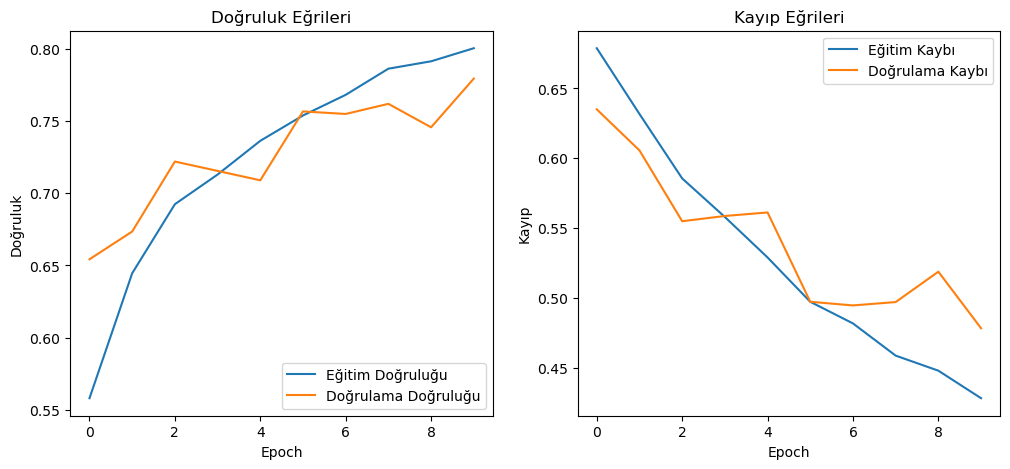

In [209]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend(loc='lower right')
plt.title('Doğruluk Eğrileri')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend(loc='upper right')
plt.title('Kayıp Eğrileri')

plt.show()

In [177]:
def create_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR,img)
        img_num = img.split('.')[0]
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (img_row,img_col))
        testing_data.append([np.array(img)])
        
    shuffle(testing_data)
    return testing_data

In [178]:
test_data=create_test_data()

100%|███████████████████████████████████████████████████████████████████████████| 12500/12500 [02:04<00:00, 100.75it/s]


In [190]:
test_data = test_data.astype("float32") / 255.0 

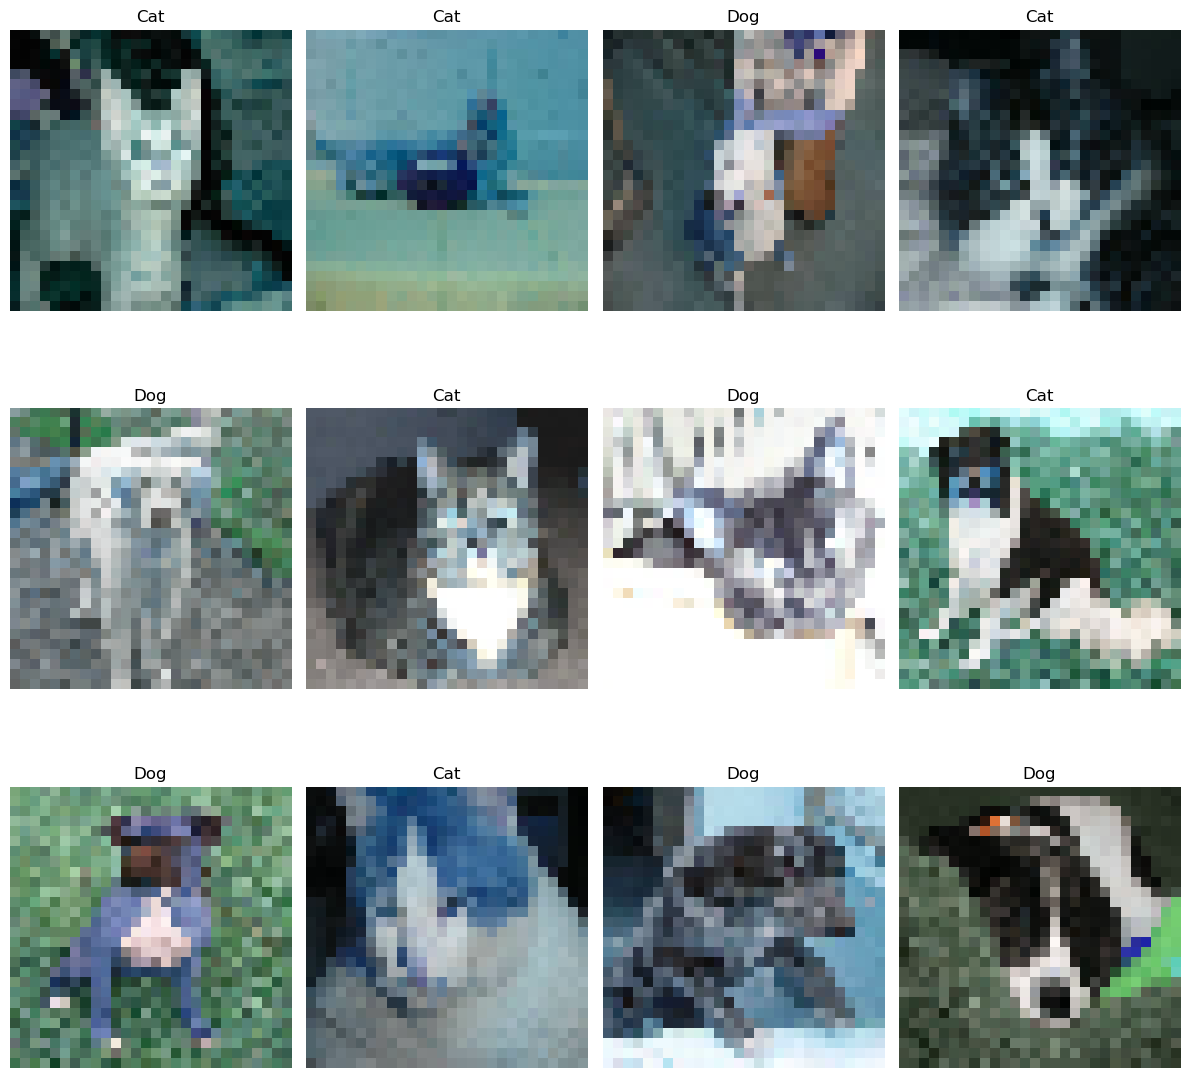

In [193]:
def display_images_with_predictions(test_data, predicted_classes):
    plt.figure(figsize=(12, 12))
    
    for i in range(12):  
        plt.subplot(3, 4, i + 1)
        plt.imshow(test_data[i]) 
        
        plt.title(f"{'Dog' if predicted_classes[i] == 1 else 'Cat'}")
        
        plt.axis('off') 
        
    plt.tight_layout()
    plt.show()

display_images_with_predictions(test_data, predicted_classes)